<a href="https://www.kaggle.com/code/barramalikwibowo/rice-leaf-diseases-detection?scriptVersionId=181923403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Rice Leaf Diseases Detection

Rice Leaf Diseases Detection ini merupakan salah satu fitur dari project yang sedang kami buat dalam rangka menyelesaikan tugas capstone project

## Input

### Library

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model, callbacks
from tensorflow.keras.layers import Flatten, Dense, Dropout

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

### Dataset

In [2]:
train_data = '/kaggle/input/rl-diseases/RL_disease/RL_disease/train'
valid_data = '/kaggle/input/rl-diseases/RL_disease/RL_disease/valid'
testing_data = '/kaggle/input/rl-diseases/Test/Test'

In [4]:
brownspot = [train_data + '/BrownSpot/' + img for img in os.listdir(train_data + '/BrownSpot')[:9]]
healthy = [train_data  + '/Healthy/' + img for img in os.listdir(train_data + '/Healthy')[:9]]
hispa = [train_data  + '/Hispa/' + img for img in os.listdir(train_data + '/Hispa')[:9]]
leafblast = [train_data  + '/LeafBlast/' + img for img in os.listdir(train_data + '/LeafBlast')[:9]]

#### Brown Spot

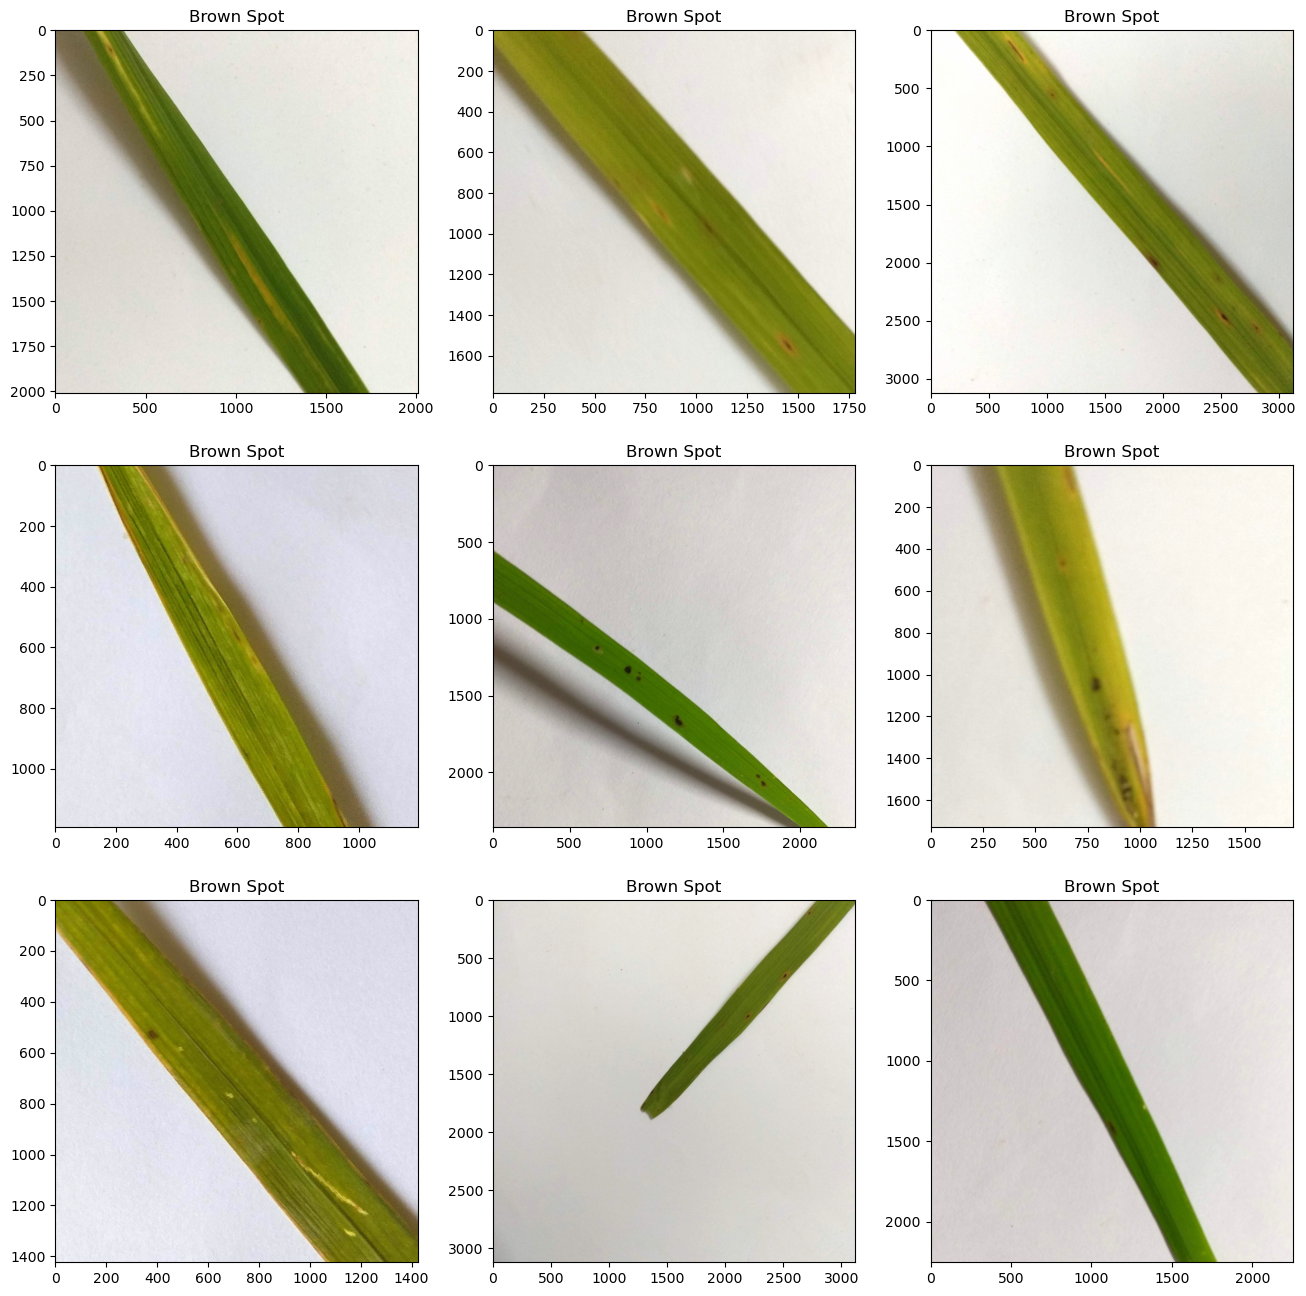

In [5]:
from PIL import Image
plt.figure(figsize=(16,16))
for i,k  in enumerate(brownspot):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Brown Spot")

#### Hispa

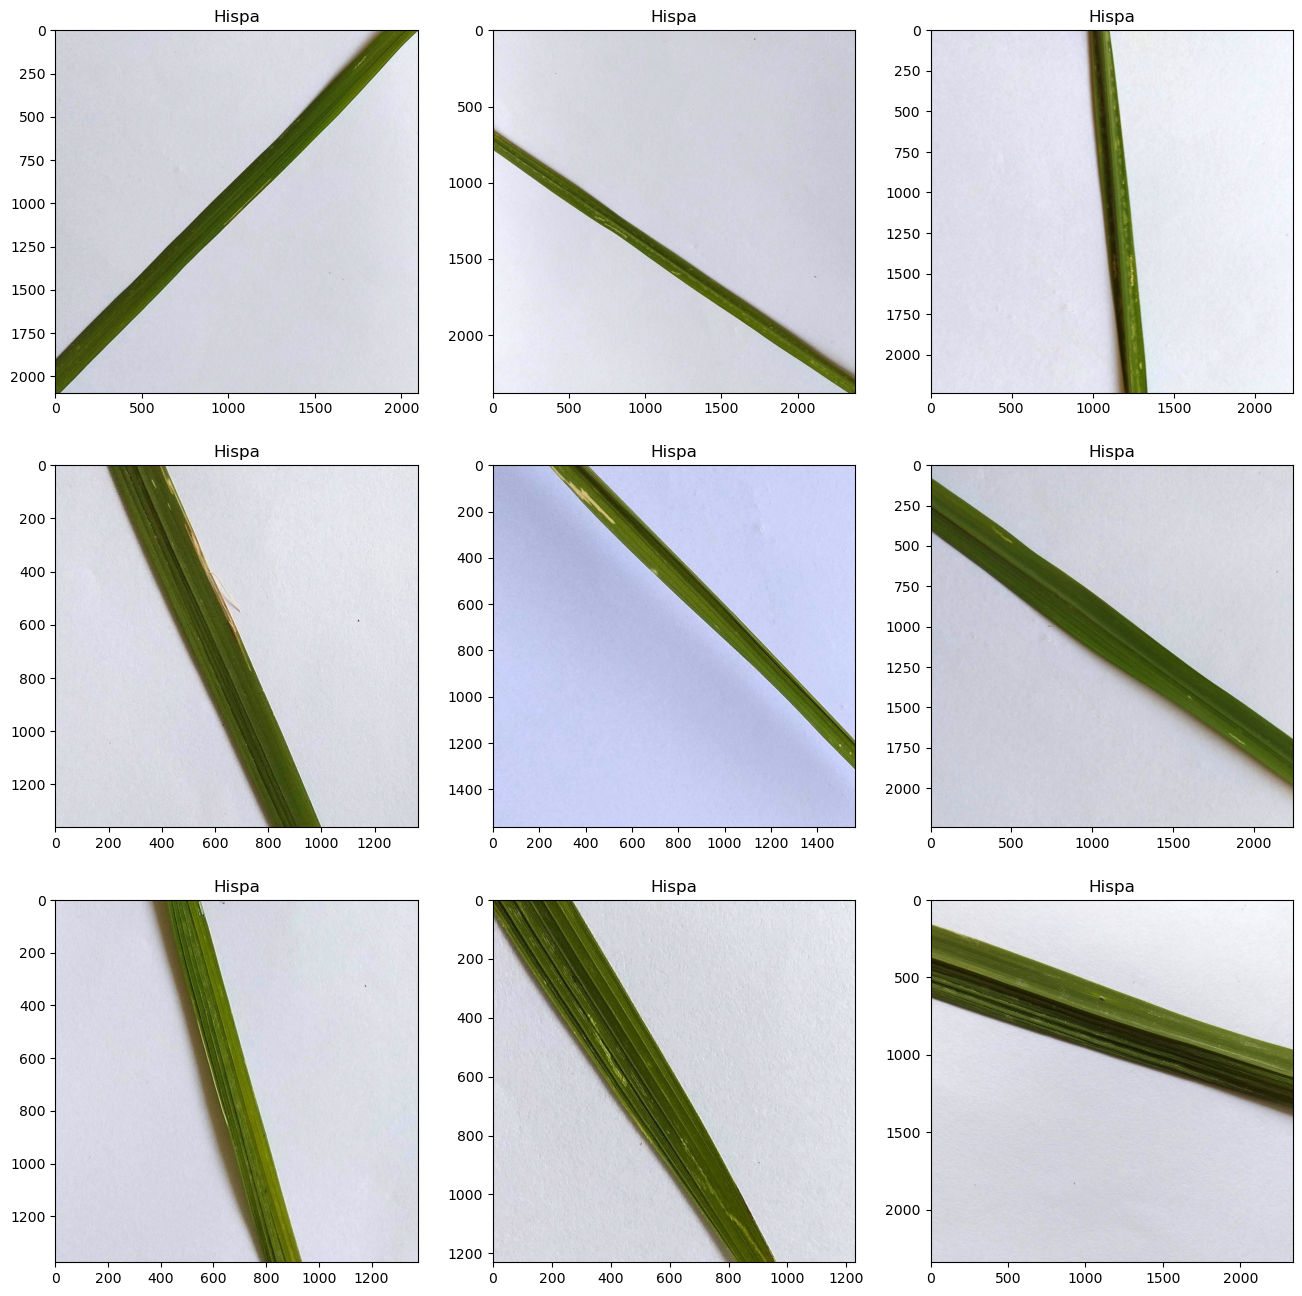

In [6]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(hispa):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Hispa")

#### Leaf Blast

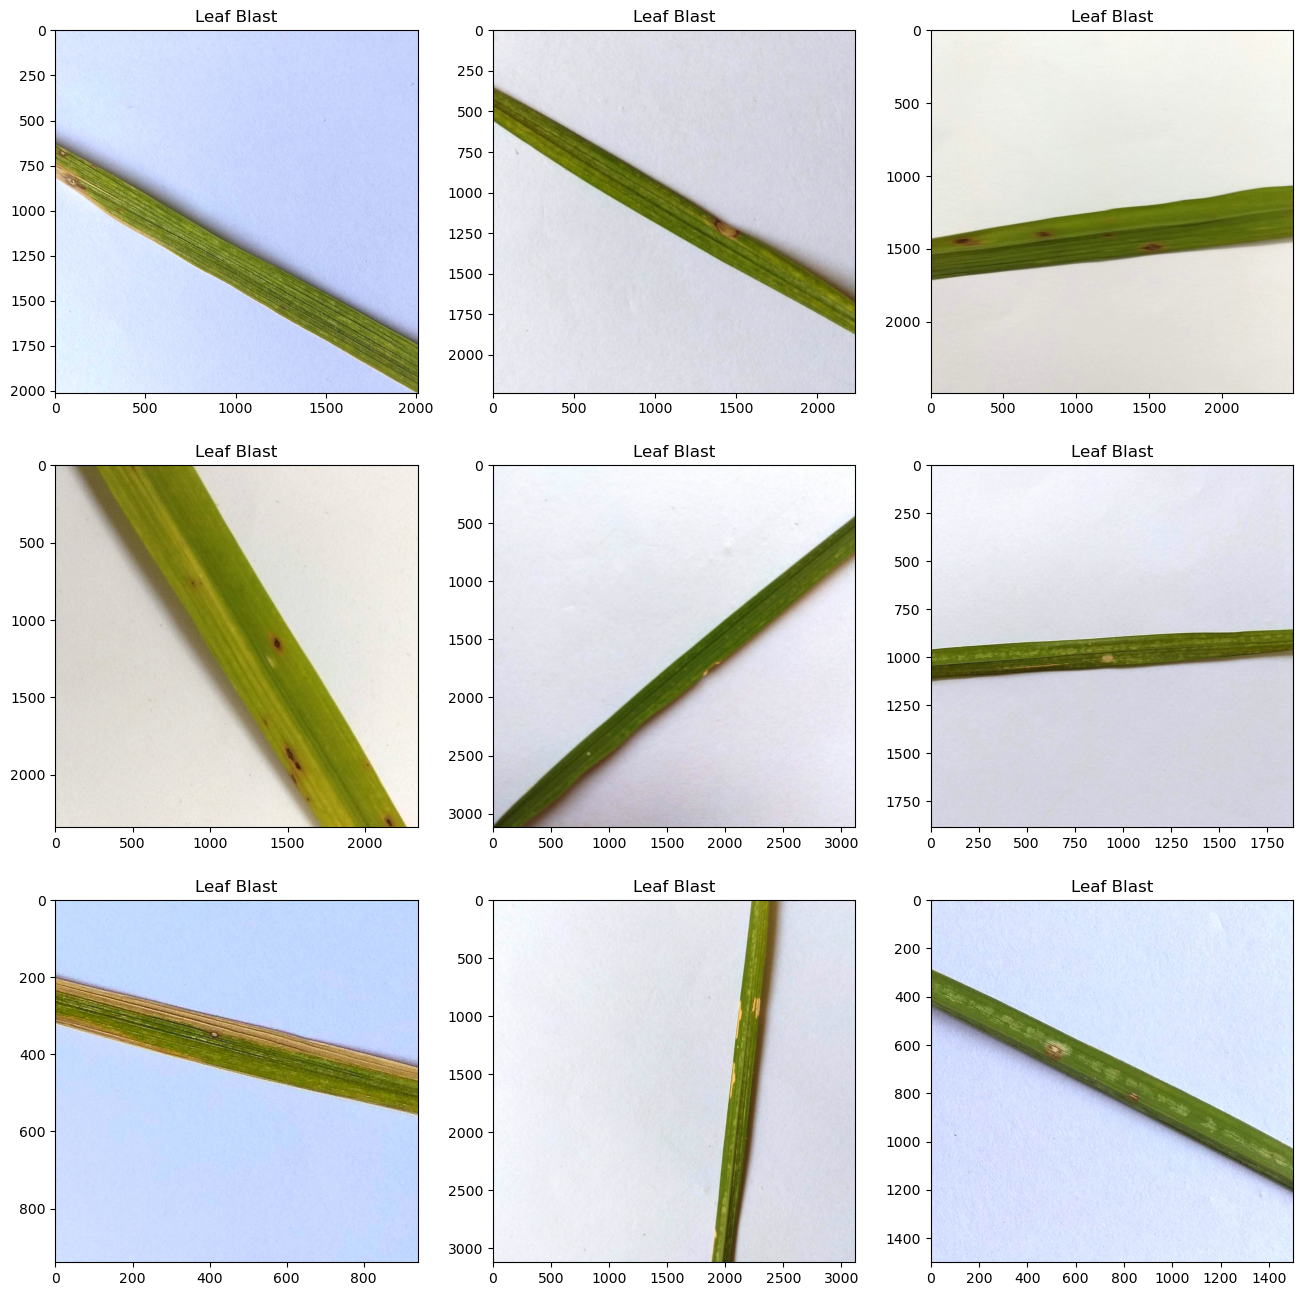

In [7]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(leafblast):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Leaf Blast")

#### Healthy

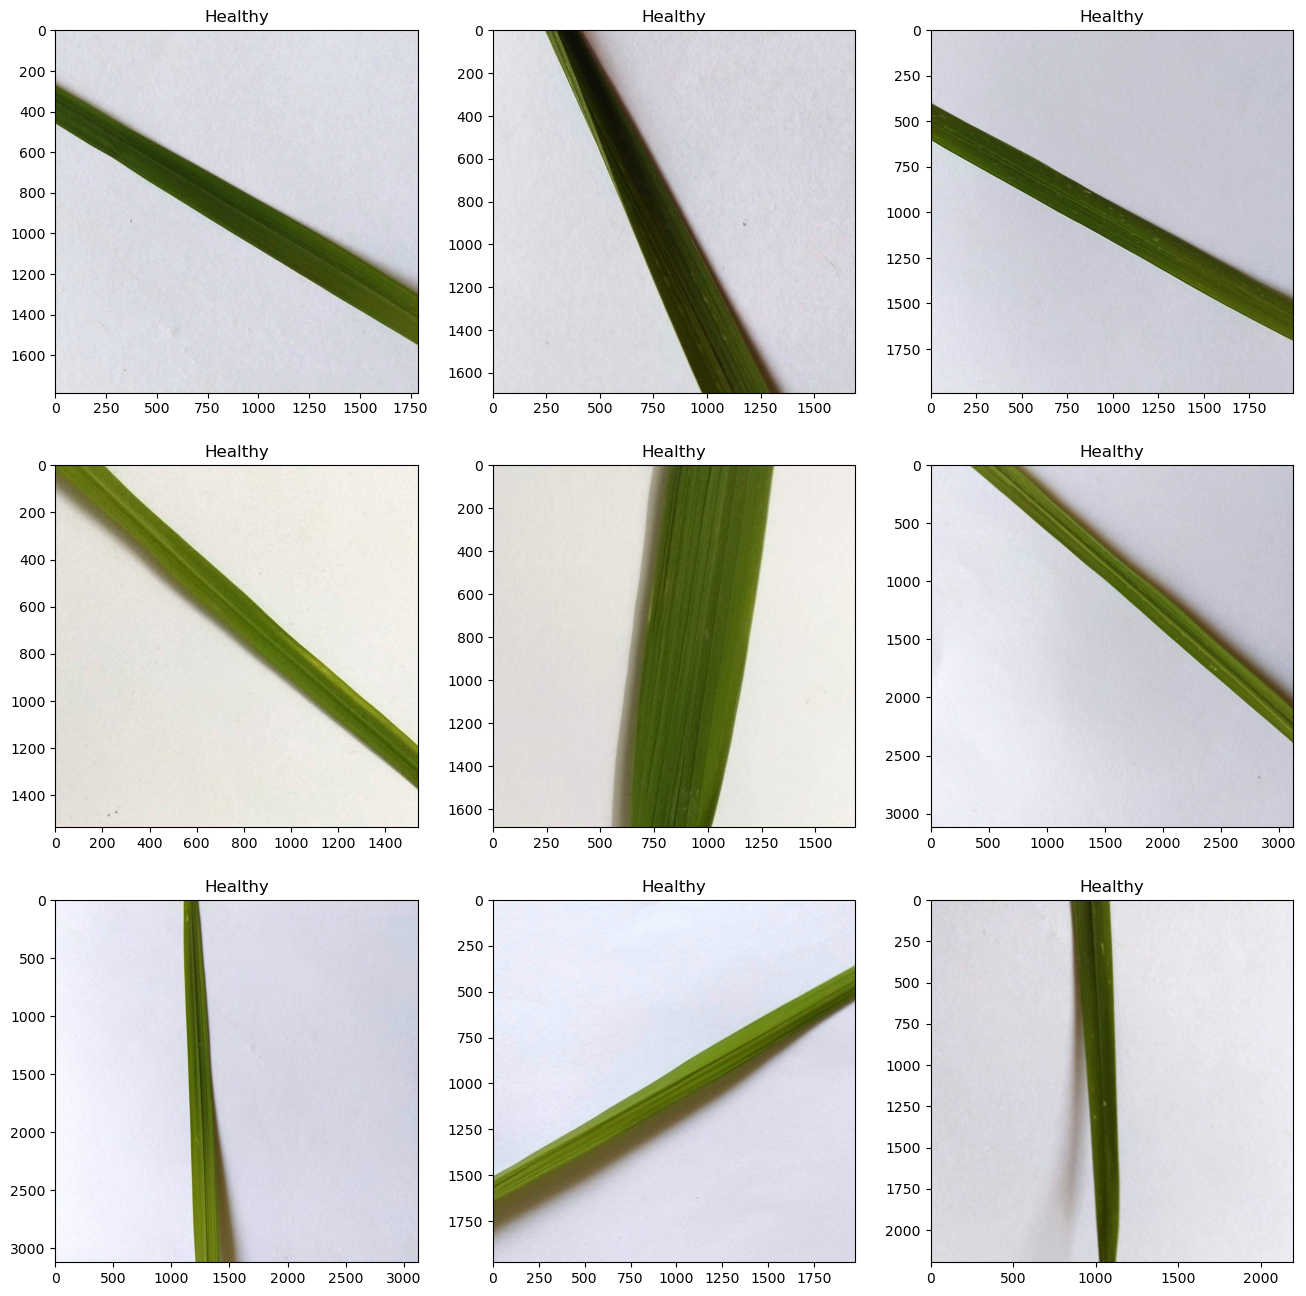

In [8]:
plt.figure(figsize=(16,16))
for i,k  in enumerate(healthy):
    image = Image.open(k)
    plt.subplot(3,3,i+1)
    plt.imshow(image)
    plt.title("Healthy")

In [9]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255)
train_data = dataGenerator.flow_from_directory(
    train_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)
val_data = dataGenerator.flow_from_directory(
    valid_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 1600 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [10]:
# Access one batch from the training data
for images, labels in train_data:
    print("Shape of training images:", images.shape)
    break  # We break the loop as we only need to inspect one batch

# Access one batch from the validation data
for images, labels in val_data:
    print("Shape of validation images:", images.shape)
    break  # Break after getting one batch

Shape of training images: (32, 224, 224, 3)
Shape of validation images: (32, 224, 224, 3)


## Model

### List Model

#### Resnet

In [11]:
resnet_model = tf.keras.applications.resnet_v2.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
resnet_model.trainable = False

#### MobileNet

In [12]:
mobilenet_model = tf.keras.applications.mobilenet_v2.MobileNetV2(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
mobilenet_model.trainable = False

#### Inception

In [13]:
inception_model = tf.keras.applications.inception_v3.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
inception_model.trainable = False

#### Vgg

In [14]:
vgg_model = tf.keras.applications.vgg19.VGG19(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
vgg_model.trainable = False

### Train Model

In [15]:
model = Sequential()

model.add(mobilenet_model)
model.add(Flatten())
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 4)                 250884    
                                                                 
Total params: 2,508,868
Trainable params: 250,884
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(optimizer = Adam(learning_rate=0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [17]:
#early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
#reduce_lr = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)

In [18]:
history = model.fit(train_data, validation_data=val_data, epochs=10) #callbacks=[early_stopping, reduce_lr])
#print(f"Training stopped at epoch: {early_stopping.stopped_epoch}")

Epoch 1/10
50/50 [==============================] - 117s 2s/step - loss: 4.4838 - accuracy: 0.5100 - val_loss: 8.9644 - val_accuracy: 0.3000
Epoch 2/10
50/50 [==============================] - 107s 2s/step - loss: 1.3573 - accuracy: 0.7538 - val_loss: 4.5974 - val_accuracy: 0.4700
Epoch 3/10
50/50 [==============================] - 107s 2s/step - loss: 0.4897 - accuracy: 0.8731 - val_loss: 5.2825 - val_accuracy: 0.4450
Epoch 4/10
50/50 [==============================] - 107s 2s/step - loss: 0.2637 - accuracy: 0.9262 - val_loss: 5.4234 - val_accuracy: 0.4025
Epoch 5/10
50/50 [==============================] - 107s 2s/step - loss: 0.1962 - accuracy: 0.9450 - val_loss: 5.2264 - val_accuracy: 0.4675
Epoch 6/10
50/50 [==============================] - 106s 2s/step - loss: 0.2594 - accuracy: 0.9325 - val_loss: 5.6660 - val_accuracy: 0.4575
Epoch 7/10
50/50 [==============================] - 110s 2s/step - loss: 0.1813 - accuracy: 0.9494 - val_loss: 6.8133 - val_accuracy: 0.4025
Epoch 8/10
50

## Save Model

In [19]:
model.save('./model.h5')
model.save('./model')
model.save('./model.tflite')

## Evaluate

### Loss & Accuracy

In [20]:
def plot_training_curves(history_df):
    plt.figure(figsize = (13, 4), dpi = 120)
    ax = plt.subplot(1, 2, 1)
    plt.plot(range(1, len(history_df) + 1), history_df['loss'], marker = '.', label = 'Training Loss')
    plt.plot(range(1, len(history_df) + 1), history_df['val_loss'], marker = '^', label = 'Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Cross Entropy')
    plt.grid()
    plt.legend()
    ax = plt.subplot(1, 2, 2) 
    plt.plot(range(1, len(history_df) + 1), history_df['accuracy'], marker = '.', label = 'Training Accuracy')
    plt.plot(range(1, len(history_df) + 1), history_df['val_accuracy'], marker = '^', label = 'Validation Accurcay')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend()
    plt.show()

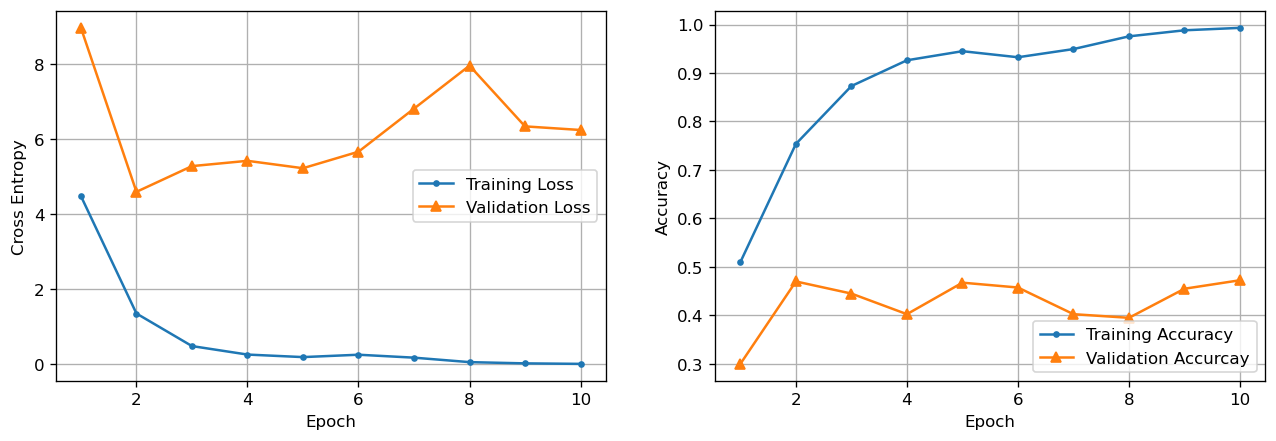

In [21]:
plot_training_curves(pd.DataFrame(history.history))

### Classification Report

In [30]:
dataGenerator = ImageDataGenerator(rescale= 1. / 255)
test_data = dataGenerator.flow_from_directory(
    testing_data,
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical',
)

Found 12 images belonging to 4 classes.


In [31]:
class_dict = test_data.class_indices
li = list(class_dict.keys())
print(li)

['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']


#### Test Data

In [32]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_data)
y_pred = np.argmax(y_pred, axis=1)
print('Classification Report')
target_names =li 
print(classification_report(test_data.classes, y_pred, target_names=target_names))

1/1 [==============================] - 0s 262ms/step
Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.14      0.33      0.20         3
     Healthy       0.00      0.00      0.00         3
       Hispa       0.00      0.00      0.00         3
   LeafBlast       0.50      0.33      0.40         3

    accuracy                           0.17        12
   macro avg       0.16      0.17      0.15        12
weighted avg       0.16      0.17      0.15        12



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Val Data

In [25]:
from sklearn.metrics import classification_report
y_pred = model.predict(val_data)
y_pred = np.argmax(y_pred, axis=1)
print('Classification Report')
target_names =li 
print(classification_report(val_data.classes, y_pred, target_names=target_names))

13/13 [==============================] - 21s 2s/step
Classification Report
              precision    recall  f1-score   support

   BrownSpot       0.30      0.12      0.17       100
     Healthy       0.20      0.23      0.22       100
       Hispa       0.26      0.32      0.29       100
   LeafBlast       0.22      0.28      0.25       100

    accuracy                           0.24       400
   macro avg       0.25      0.24      0.23       400
weighted avg       0.25      0.24      0.23       400



## Confusion Matrix

#### Test Data

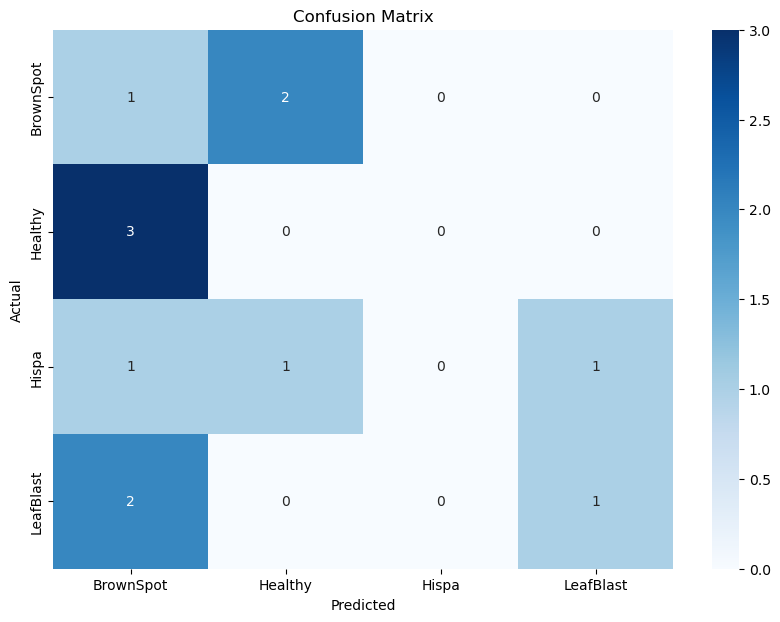

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_data.classes, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

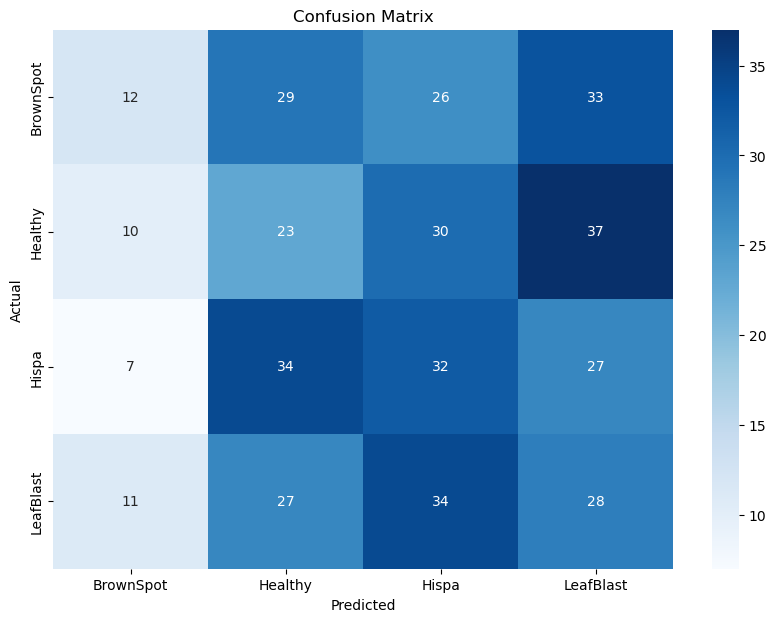

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming your class names are as follows
class_names = ['BrownSpot', 'Healthy', 'Hispa', 'LeafBlast']

cm = confusion_matrix(val_data.classes, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Test Random

In [34]:
from PIL import Image
from keras.models import load_model
# Load the trained model
model = model

# Define the image size and preprocessing function
img_size = (224, 224)
def preprocess_image(img_path):
    img = Image.open(img_path).convert('RGB')
    img = img.resize(img_size)
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    return img

# Set the path to the image folder
test_dir = '/kaggle/input/rl-diseases/random/random'
img_folder = test_dir
class_names = list(train_data.class_indices.keys())
# Loop through all the images in the folder and make predictions
for filename in os.listdir(img_folder):
    img_path = os.path.join(img_folder, filename)
    img = preprocess_image(img_path)
    pred = model.predict(img)
    class_idx = np.argmax(pred)
    class_name = class_names[class_idx]
    print(f'Image: {filename}, Class: {class_name}')

1/1 [==============================] - 1s 1s/step
Image: Health2.jpg, Class: BrownSpot
1/1 [==============================] - 0s 30ms/step
Image: Brownspot2.jpg, Class: BrownSpot
1/1 [==============================] - 0s 23ms/step
Image: Hispa2.jpg, Class: BrownSpot
1/1 [==============================] - 0s 22ms/step
Image: Blast2.jpg, Class: LeafBlast
1/1 [==============================] - 0s 22ms/step
Image: Health1.jpg, Class: Healthy
1/1 [==============================] - 0s 22ms/step
Image: Blast3.jpg, Class: BrownSpot
1/1 [==============================] - 0s 22ms/step
Image: Blast1.jpg, Class: BrownSpot
1/1 [==============================] - 0s 22ms/step
Image: Hispa1.jpg, Class: BrownSpot
1/1 [==============================] - 0s 22ms/step
Image: Hispa3.jpg, Class: BrownSpot
1/1 [==============================] - 0s 22ms/step
Image: Health3.jpg, Class: Healthy
1/1 [==============================] - 0s 22ms/step
Image: Brownspot1.jpg, Class: BrownSpot
1/1 [======================